In [1]:
# Classification - CNN - Fashinon MNIST data set
# Credit Lazy Programmer Bootcamp

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# data has 2D
# for CNN we need height X width X color 
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
# Number of classes 
K = len(set(y_train))
print(K)

10


In [15]:
# Biuld Model
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [16]:
# Compile model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
# Fit the model
r = model.fit(x_train, y_train,
             validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5377 - accuracy: 0.8015 - val_loss: 0.4017 - val_accuracy: 0.8524
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3719 - accuracy: 0.8612 - val_loss: 0.3662 - val_accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3209 - accuracy: 0.8795 - val_loss: 0.3231 - val_accuracy: 0.8825
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2884 - accuracy: 0.8910 - val_loss: 0.3064 - val_accuracy: 0.8876
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2699 - accuracy: 0.8988 - val_loss: 0.3011 - val_accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2472 - accuracy: 0.9081 - val_loss: 0.2949 - val_accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2339 - accuracy: 0.9114 - val_loss: 0.2950 -

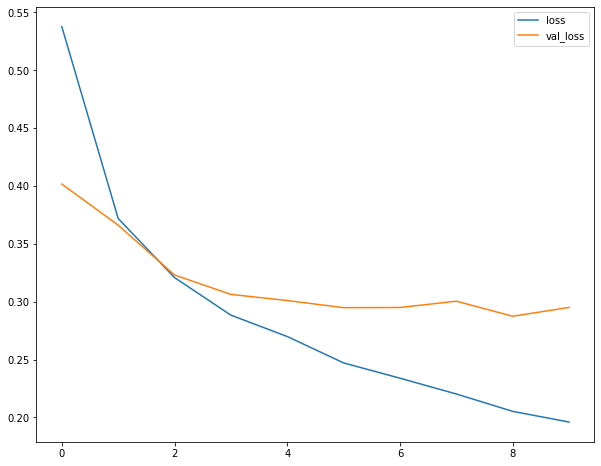

In [19]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

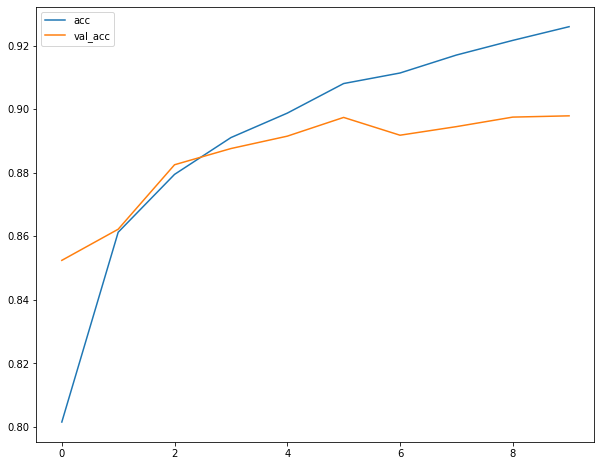

In [21]:
# Plot accuracy per iteration
plt.figure(figsize=(10,8))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [22]:
# Evaluation 
from sklearn.metrics import confusion_matrix

In [24]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)

[[827   1  25  24   1   2 115   0   5   0]
 [  0 976   1  17   1   0   3   0   2   0]
 [ 16   0 839   9  70   0  65   0   1   0]
 [ 12   3  16 905  38   1  25   0   0   0]
 [  1   1  50  21 876   0  49   0   2   0]
 [  0   0   0   0   0 979   0  12   1   8]
 [ 89   1  58  27 134   0 679   0  12   0]
 [  0   0   0   0   0   7   0 964   1  28]
 [  1   0   2   3   8   1   8   1 975   1]
 [  1   0   0   0   0   8   0  32   0 959]]


In [25]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [26]:
# Show Misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]

Text(0.5, 1.0, 'True label: Pullover Predicted: Coat')

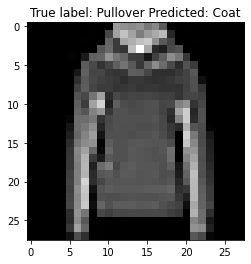

In [29]:
# Pick any random misclassified sample
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [30]:
# Thank You